In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales_data.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get basic information about the dataset
print(df.info())

# Generate descriptive statistics
print(df.describe())

         Date Product Category  Sales Volume  Revenue Region Salesperson
0  2023-01-01         Clothing            18     3863   West         Bob
1  2023-01-02             Toys            12     1953  North     Charlie
2  2023-01-03      Electronics             2     4759   West         Bob
3  2023-01-04         Clothing            10     1391   West       Alice
4  2023-01-05         Clothing             4     3681   East       David
Date                0
Product Category    0
Sales Volume        0
Revenue             0
Region              0
Salesperson         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              100 non-null    object
 1   Product Category  100 non-null    object
 2   Sales Volume      100 non-null    int64 
 3   Revenue           100 non-null    int64 
 4   Region            100 non-null   

In [10]:
# 1. Handling Missing Values

# Checking missing values
print(df.isnull().sum())

# Dropping rows with missing values (if any)
df.dropna(inplace=True)

# 2. Remove Duplicates
df.drop_duplicates(inplace=True)

# 3. Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 4. Check for any inconsistent data types
print(df.dtypes)


Date                0
Product Category    0
Sales Volume        0
Revenue             0
Region              0
Salesperson         0
dtype: int64
Date                datetime64[ns]
Product Category            object
Sales Volume                 int64
Revenue                      int64
Region                      object
Salesperson                 object
dtype: object


Total Revenue: 271447
Average Sales Volume: 9.22
Revenue by Region:
Region
East     64632
North    63087
South    75102
West     68626
Name: Revenue, dtype: int64


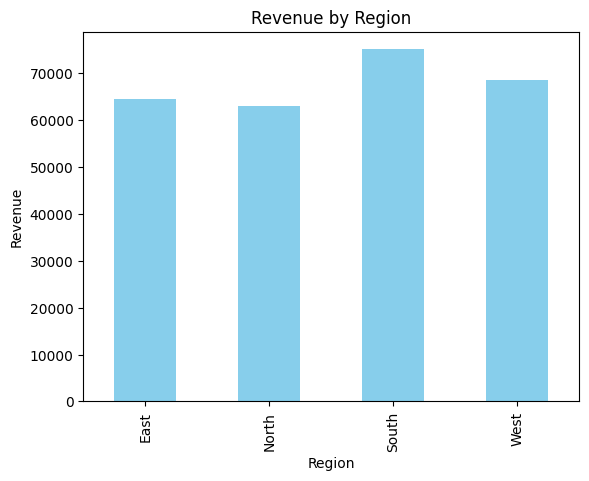

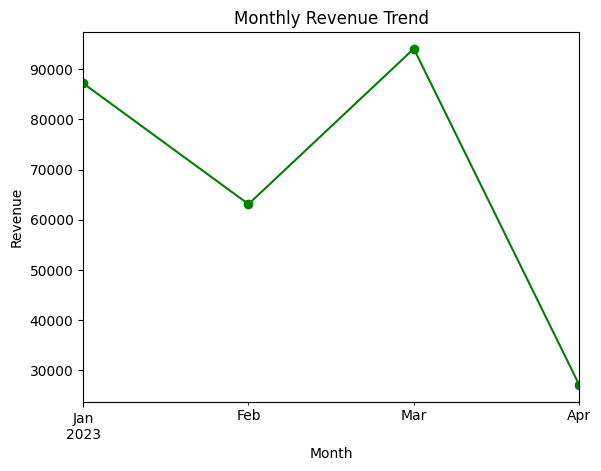

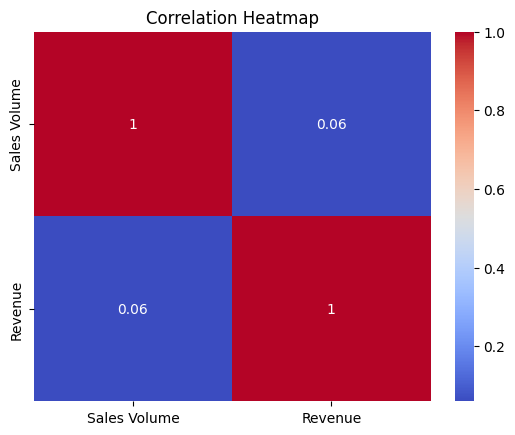

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Aggregates
total_revenue = df['Revenue'].sum()
average_sales_volume = df['Sales Volume'].mean()
print(f"Total Revenue: {total_revenue}")
print(f"Average Sales Volume: {average_sales_volume}")

# 2. Revenue by Region
revenue_by_region = df.groupby('Region')['Revenue'].sum()
print("Revenue by Region:")
print(revenue_by_region)

# Plot Revenue by Region
revenue_by_region.plot(kind='bar', title='Revenue by Region', color='skyblue')
plt.ylabel('Revenue')
plt.show()

# 3. Sales Trend Over Time
df['Month'] = df['Date'].dt.to_period('M')  # Extract month
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Plot Monthly Revenue
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', marker='o', color='green')
plt.ylabel('Revenue')
plt.show()

# 4. Correlation Heatmap
correlation_matrix = df[['Sales Volume', 'Revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
import sqlite3

# 1. Create a connection to SQLite database
conn = sqlite3.connect('sales_data.db')  # Creates or opens a database file
cursor = conn.cursor()

# 2. Save the DataFrame to a SQL table
df.to_sql('sales_data', conn, if_exists='replace', index=False)

100

In [37]:
# 3. Query 1: Total Revenue by Region
query1 = """
SELECT Region, SUM(Revenue) AS Total_Revenue
FROM sales_data
GROUP BY Region
ORDER BY Total_Revenue DESC;
"""
result1 = cursor.execute(query1).fetchall()
print("Total Revenue by Region:")
for row in result1:
    print(row)

Total Revenue by Region:
('South', 75102)
('West', 68626)
('East', 64632)
('North', 63087)


In [38]:
# 4. Query 2: Monthly Revenue Trend
query2 = """
SELECT strftime('%Y-%m', Date) AS Month, SUM(Revenue) AS Total_Revenue
FROM sales_data
GROUP BY Month
ORDER BY Month;
"""
result2 = cursor.execute(query2).fetchall()
print("\nMonthly Revenue Trend:")
for row in result2:
    print(row)


Monthly Revenue Trend:
('2023-01', 87227)
('2023-02', 63085)
('2023-03', 94140)
('2023-04', 26995)


In [39]:
# 5. Query 3: Top Product Categories by Revenue
query3 = """
SELECT "Product_Category", SUM(Revenue) AS Total_Revenue
FROM sales_data
GROUP BY "Product_Category"
ORDER BY Total_Revenue DESC
LIMIT 5;
"""
result3 = cursor.execute(query3).fetchall()
print("\nTop Product Categories by Revenue:")
for row in result3:
    print(row)


Top Product Categories by Revenue:
('Product_Category', 271447)
